In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [16]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [17]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [19]:
X_train.shape

(512, 8)

In [20]:
X_test.shape

(256, 8)

In [21]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.779
Test set score: 0.742


In [23]:
logreg.intercept_.T

array([-0.35820476])

In [101]:
logreg.coef_.T

array([[ 0.20398889],
       [ 0.45674873],
       [-0.02314261],
       [-0.00861687],
       [ 0.08796794],
       [ 0.28353597],
       [ 0.10949146],
       [ 0.12381519]])

### Confusion Matrix

In [102]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[139  28]
 [ 38  51]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       167
           1       0.65      0.57      0.61        89

    accuracy                           0.74       256
   macro avg       0.72      0.70      0.71       256
weighted avg       0.74      0.74      0.74       256



### ROC

Accuracy= 0.76171875


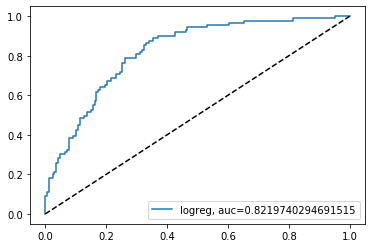

In [116]:
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y_test, y_pred))
 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr1,tpr1,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

### Gains / Lift Chart

In [ ]:

#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

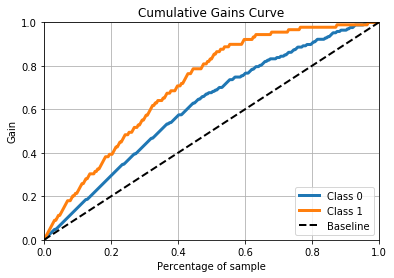

In [104]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

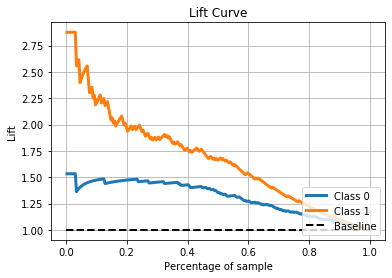

In [105]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()

# K-NN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [107]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [108]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [9, 10, 11]


### K-NN Result Visualisation

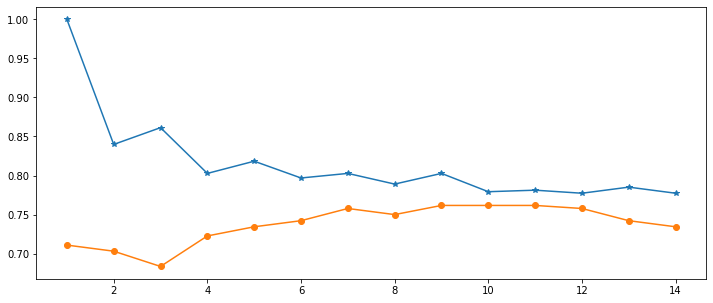

In [109]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

This one compares...

#### The best result is captured at k = 11 hence 11 is used for the final model

In [110]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

## Model Performance Analysis

In [111]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,39,50,89
All,184,72,256


In [112]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.69      0.56      0.62        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.72       256
weighted avg       0.76      0.76      0.75       256



In [117]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_proba)

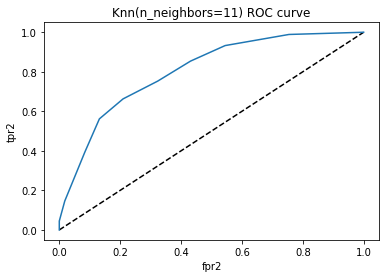

In [120]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr2')
plt.ylabel('tpr2')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [119]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8042454417008679

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

# Naiive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

In [ ]:
# Training your model 
mod.fit(X_train, y_train)

In [ ]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [ ]:
mod.score(X_test,y_test)

In [ ]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

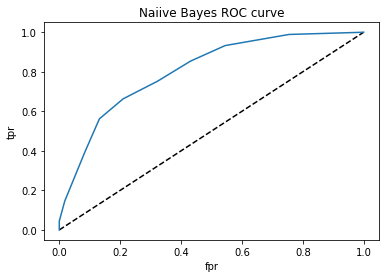

In [126]:
from sklearn.metrics import roc_curve
y_pred_proba = mod.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naiive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naiive Bayes ROC curve')
plt.show()

In [ ]:
# You can compare the performance of multiple models in one ROC chart. Wrtie your own codes in the cells below.

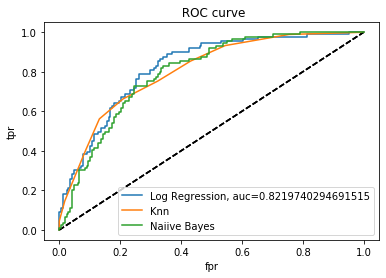

In [131]:
plt.plot(fpr1,tpr1,label="Log Regression, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2, label='Knn')

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr3,tpr3, label='Naiive Bayes')

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(' ROC curve')

plt.legend(loc=4)
plt.show()